In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import matplotlib.dates as dates
import pymannkendall as mk
import seaborn as sns

## analysis of trend and state


First the functions used for calculating trend and state

In [141]:
def state_V1_GPG(year, time_series):   
    first13 = time_series[str(year-15):str(year-3)] 
    first13plus2 = np.append(first13.values,[first13.min()*0.95, first13.max()*1.05])
    last3 = time_series[str(year-2):str(year)] 
    
    rank_first13 = stats.percentileofscore(first13plus2, first13.mean()) 
    rank_last3 = stats.percentileofscore(first13plus2, last3.mean())
    
    return rank_first13, rank_last3 

def state_V1_TrendsEarth(year, time_series):   
    all16years = time_series[str(year-15):str(year)] 
    #first13 = time_series[str(year-15):str(year-3)] 
    all16yearsPlus2 = np.append(all16years.values,[all16years.min()*0.95, all16years.max()*1.05])
    last3 = time_series[str(year-2):str(year)] 
    
    rank_all16 = stats.percentileofscore(all16yearsPlus2, all16yearsPlus2.mean()) 
    rank_last3 = stats.percentileofscore(all16yearsPlus2, last3.mean())
    
    return rank_all16, rank_last3 


def z_score(year, time_series):    
    first13 = time_series[str(year-15):str(year-3)] 
    last3 = time_series[str(year-2):str(year)] 
    
    z = (last3.mean() - first13.mean()) / (first13.std() / np.sqrt(last3.count()))
        
    return z

def trend(year, time_series):    
    all16years = time_series[str(year-15):str(year)] 
    t, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(all16years, alpha=0.1)
    return t, h, p, z, Tau, s, var_s, slope, intercept 

In [176]:
def plot_ndvi(year, df): 
    first13 = df[str(year-15):str(year-3)] 
    last3 = df[str(year-2):str(year)] 
    all16 = df[str(year-15):str(year)] 

    GPG_rank_first13, GPG_rank_last3 = state_V1_GPG(year, df['ndvi'])
    GPG_rank_diff = GPG_rank_last3 - GPG_rank_first13
    TE_rank_all16, TE_rank_last3 = state_V1_TrendsEarth(year, df['ndvi'])
    TE_rank_diff = TE_rank_last3 - TE_rank_all16
    z_s  = z_score(year, df['ndvi'])
    t, h, p, z, Tau, s, var_s, slp, intercept  = trend(year, df['ndvi'])

    fig, ax = plt.subplots(figsize=[10,2], sharey=True)

    #plot all points in small 
    df.plot.scatter(x='year', y='ndvi', marker='.', color='k', linestyle='None', zorder=1, ax=ax)

    first13.plot.scatter(x='year', y='ndvi', marker='o', color='b', linestyle='None', zorder=2, ax=ax)
    last3.plot.scatter(x='year', y='ndvi', marker='s', color='r', linestyle='None', zorder=2, ax=ax)
    ax.plot([year-15,year-3],[first13['ndvi'].mean(),first13['ndvi'].mean()], color= 'b')
    ax.plot([year-15,year],[last3['ndvi'].mean(),last3['ndvi'].mean()], color= 'r')
    ax.plot(all16['year'], intercept + (all16['year'] - (year-15)) * slp, color='k') 

    text_in_plot = 'GPG_rank_first13='+str(format(GPG_rank_first13,'.1f'))+'\n'+  \
                   'GPG_rank_last3='+str(format(GPG_rank_last3,'.1f'))+'\n' + \
                   'TE_rank_all16='+str(format(TE_rank_all16,'.1f'))+'\n'+  \
                   'TE_rank_last3='+str(format(TE_rank_last3,'.1f'))+'\n' + \
                   'z value='+str(format(z_s, '.2f'))+'\n' + \
                    'trend='+t+'\n' + \
                    'p value of trend='+str(format(p, '.2f'))
    ax.text(1.01, 0.01, text_in_plot, transform=ax.transAxes)
    plt.show()

def plot_ndvi_only_points(year, df): 
    first13 = df[str(year-15):str(year-3)] 
    last3 = df[str(year-2):str(year)] 
    all16 = df[str(year-15):str(year)] 

    GPG_rank_first13, GPG_rank_last3 = state_V1_GPG(year, df['ndvi'])
    GPG_rank_diff = GPG_rank_last3 - GPG_rank_first13
    TE_rank_all16, TE_rank_last3 = state_V1_TrendsEarth(year, df['ndvi'])
    TE_rank_diff = TE_rank_last3 - TE_rank_all16
    z_s  = z_score(year, df['ndvi'])
    t, h, p, z, Tau, s, var_s, slp, intercept  = trend(year, df['ndvi'])

    fig, ax = plt.subplots(figsize=[10,2], sharey=True)

    #plot all points in small 
    df.plot.scatter(x='year', y='ndvi', marker='.', color='k', linestyle='None', zorder=1, ax=ax)

    first13.plot.scatter(x='year', y='ndvi', marker='o', color='b', linestyle='None', zorder=2, ax=ax)
    last3.plot.scatter(x='year', y='ndvi', marker='s', color='r', linestyle='None', zorder=2, ax=ax)
    #ax.plot([year-15,year-3],[first13['ndvi'].mean(),first13['ndvi'].mean()], color= 'b')
    #ax.plot([year-15,year],[last3['ndvi'].mean(),last3['ndvi'].mean()], color= 'r')
    #ax.plot(all16['year'], intercept + (all16['year'] - (year-15)) * slp, color='k') 

    text_in_plot = 'GPG_rank_first13='+str(format(GPG_rank_first13,'.1f'))+'\n'+  \
                   'GPG_rank_last3='+str(format(GPG_rank_last3,'.1f'))+'\n' + \
                   'TE_rank_all16='+str(format(TE_rank_all16,'.1f'))+'\n'+  \
                   'TE_rank_last3='+str(format(TE_rank_last3,'.1f'))+'\n' + \
                   'z value='+str(format(z_s, '.2f'))+'\n' + \
                    'trend='+t+'\n' + \
                    'p value of trend='+str(format(p, '.2f'))
    #ax.text(1.01, 0.01, text_in_plot, transform=ax.transAxes)
    plt.show()


## now to the simulations.
first the params:

year is the year of analysis (it will alway generate a time series from 2000 to 2021)

repeat is how many simulations. Plot=1 means plot each simulation (don't use if too many, like more than 100)

change_last_3 will add that value to the last 3 years

In [191]:
# year of analyssis
year = 2021
repeat = 1000
plot = 0

#parameters for synthetic ndvi time series
slope = 0.0 
rand_mu = 0.5
rand_sigma=0.05

change_last_3 = -0.05

In [192]:
results = pd.DataFrame()

for i in range(repeat):
    # create the synthetic ndvi time series
    df = pd.DataFrame()
    df['year']= np.arange(2000, 2022)
    df.index= pd.date_range(start='2000', end='2022', freq='1Y')
    df['ndvi'] = slope * (df['year']-2000) + np.random.normal(rand_mu, rand_sigma, 22)  
    
    # substract from the last 3 years a value equal to the random noise
    df.loc[str(year-2):str(year), ['ndvi']] =  df.loc[str(year-2):str(year), ['ndvi']] + change_last_3
    
    if i == 0:
        array_ndvi=df['ndvi'].values
    else:
        array_ndvi= np.vstack((array_ndvi,df['ndvi'].values))

    # split the time series
    first13 = df[str(year-15):str(year-3)] 
    last3 = df[str(year-2):str(year)] 
    all16 = df[str(year-15):str(year)] 

    GPG_rank_first13, GPG_rank_last3 = state_V1_GPG(year, df['ndvi'])
    GPG_rank_diff = round(GPG_rank_last3 - GPG_rank_first13, 2)
    TE_rank_all16, TE_rank_last3 = state_V1_TrendsEarth(year, df['ndvi'])
    TE_rank_diff = round(TE_rank_last3 - TE_rank_all16, 2)
    z_s  = z_score(year, df['ndvi'])
    t, h, p, z, Tau, s, var_s, slp, intercept  = trend(year, df['ndvi'])

    df_result = pd.DataFrame(np.array([[slope,rand_mu,rand_sigma,
                                        GPG_rank_first13,GPG_rank_last3,GPG_rank_diff,
                                        TE_rank_all16,TE_rank_last3,TE_rank_diff,
                                        z_s,slp]]), 
                                        columns=['slope','rand_mu','rand_sigma',
                                        'GPG_rank_first13', 'GPG_rank_last3','GPG_rank_diff',
                                        'TE_rank_all16','TE_rank_last3','TE_rank_diff',
                                        'z score','trend (slope)'], 
                                        index=[i])
    df_result['trend (signif)'] = t
    #df_result['ndvi'] = df['ndvi'].values
    
    results=results.append(df_result)
    
    if plot: 
        plot_ndvi(year, df)
 

In [193]:
results

,slope,rand_mu,rand_sigma,GPG_rank_first13,GPG_rank_last3,GPG_rank_diff,TE_rank_all16,TE_rank_last3,TE_rank_diff,z score,trend (slope),trend (signif)
0,0.0,0.5,0.05,46.666667,20.000000,-26.67,55.555556,22.222222,-33.33,-1.945558,-0.006163,no trend
1,0.0,0.5,0.05,40.000000,20.000000,-20.00,44.444444,22.222222,-22.22,-1.709031,-0.006891,decreasing
2,0.0,0.5,0.05,40.000000,13.333333,-26.67,44.444444,22.222222,-22.22,-3.193237,0.000733,no trend
3,0.0,0.5,0.05,60.000000,13.333333,-46.67,44.444444,22.222222,-22.22,-1.794422,-0.001962,no trend
4,0.0,0.5,0.05,53.333333,40.000000,-13.33,55.555556,44.444444,-11.11,-0.399602,-0.003083,no trend
5,0.0,0.5,0.05,46.666667,13.333333,-33.33,55.555556,22.222222,-33.33,-1.504767,-0.001474,no trend
6,0.0,0.5,0.05,40.000000,26.666667,-13.33,38.888889,27.777778,-11.11,-1.720524,-0.009307,decreasing
7,0.0,0.5,0.05,60.000000,6.666667,-53.33,44.444444,11.111111,-33.33,-3.456196,-0.007303,decreasing
8,0.0,0.5,0.05,53.333333,0.000000,-53.33,33.333333,11.111111,-22.22,-5.715958,-0.007476,decreasing
9,0.0,0.5,0.05,60.000000,0.000000,-60.00,50.000000,11.111111,-38.89,-4.641791,-0.001940,no trend


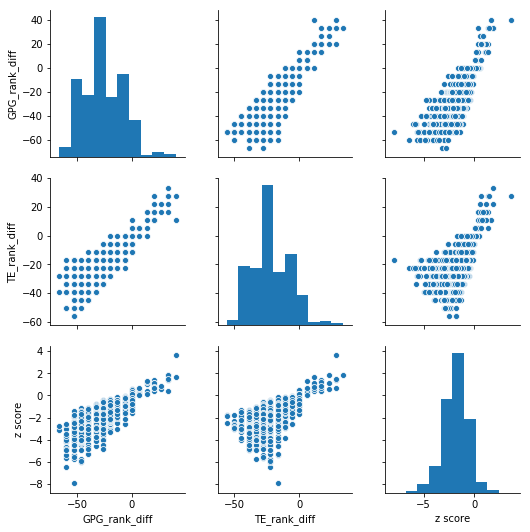

In [222]:
sns.pairplot(results[['GPG_rank_diff','TE_rank_diff','z score']])
plt.show()

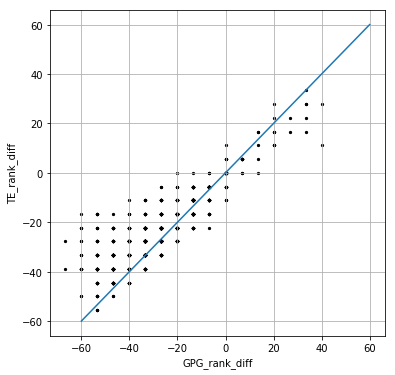

In [194]:
fig, ax = plt.subplots(figsize=[6,6], sharey=True)
results.plot.scatter(x='GPG_rank_diff', y='TE_rank_diff', grid=True, color='k', marker='.', ax=ax)
ax.plot([-60,60],[-60,60])
plt.show()


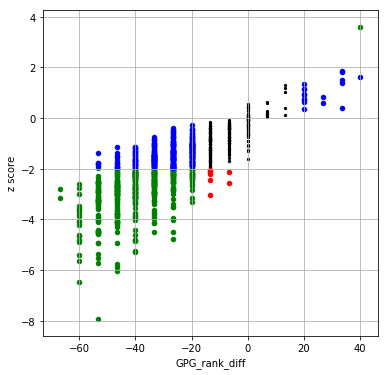

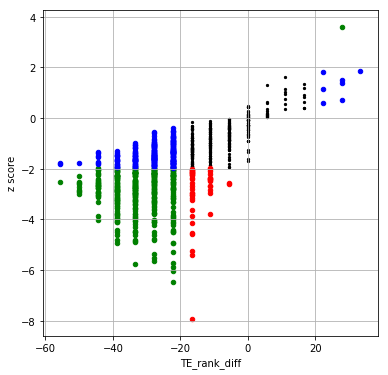

1000 simulations run
745  simulations had positive or negative change in GPG State (abs value >= 20 )
623  simulations had positive or negative change in T.E. State (abs value >= 20 )
430  simulations had z value >= 1.96
219  simulations had positive or negative trend


In [220]:
rank_diff = 20
z= 1.96

fig, ax = plt.subplots(figsize=[6,6], sharey=True)
results.plot.scatter(x='GPG_rank_diff', y='z score', color='k', marker='.', ax=ax)

if not results.loc[(results['GPG_rank_diff'].abs() >= rank_diff) & (results['z score'].abs() >= z)].empty:
    results.loc[(results['GPG_rank_diff'].abs() >= rank_diff) & (results['z score'].abs() >= z)].plot.scatter(x='GPG_rank_diff', y='z score', color='g', ax=ax)
if not results.loc[(results['GPG_rank_diff'].abs() < rank_diff) & (results['z score'].abs() >= z)].empty:
    results.loc[(results['GPG_rank_diff'].abs() < rank_diff) & (results['z score'].abs() >= z)].plot.scatter(x='GPG_rank_diff', y='z score', color='r', ax=ax)
if not results.loc[(results['GPG_rank_diff'].abs() >= rank_diff) & (results['z score'].abs() < z)].empty:
    results.loc[(results['GPG_rank_diff'].abs() >= rank_diff) & (results['z score'].abs() < z)].plot.scatter(x='GPG_rank_diff', y='z score', color='b', ax=ax)
ax.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=[6,6], sharey=True)
results.plot.scatter(x='TE_rank_diff', y='z score', color='k', marker='.', ax=ax)
if not results.loc[(results['TE_rank_diff'].abs() >= rank_diff) & (results['z score'].abs() >= z)].empty:
    results.loc[(results['TE_rank_diff'].abs() >= rank_diff) & (results['z score'].abs() >= z)].plot.scatter(x='TE_rank_diff', y='z score', color='g', ax=ax)
if not results.loc[(results['TE_rank_diff'].abs() < rank_diff) & (results['z score'].abs() >= z)].empty:
    results.loc[(results['TE_rank_diff'].abs() < rank_diff) & (results['z score'].abs() >= z)].plot.scatter(x='TE_rank_diff', y='z score', color='r', ax=ax)
if not results.loc[(results['TE_rank_diff'].abs() >= rank_diff) & (results['z score'].abs() < z)].empty:
    results.loc[(results['TE_rank_diff'].abs() >= rank_diff) & (results['z score'].abs() < z)].plot.scatter(x='TE_rank_diff', y='z score', color='b', ax=ax)
ax.grid(True)
plt.show()
  
print(repeat, 'simulations run')
print(results.loc[results['GPG_rank_diff'].astype(float).abs() >= rank_diff, 'GPG_rank_diff'].count(), ' simulations had positive or negative change in GPG State (abs value >=',rank_diff,')')
print(results.loc[results['TE_rank_diff'].astype(float).abs() >= rank_diff, 'TE_rank_diff'].count(), ' simulations had positive or negative change in T.E. State (abs value >=',rank_diff,')')
print(results.loc[results['z score'].abs() >= z, 'z score'].count(), ' simulations had z value >=', z)
print(results.loc[results['trend (signif)'] != 'no trend', 'trend (signif)'].count(), ' simulations had positive or negative trend')



select simulations based on the value combinations

In [224]:
results.loc[(results['TE_rank_diff'].abs() <10) & (results['z score'].abs() > 2)]
#results.loc[(results['rank_diff'] < rank_diff) & (results['z score'] >= z)]

,slope,rand_mu,rand_sigma,GPG_rank_first13,GPG_rank_last3,GPG_rank_diff,TE_rank_all16,TE_rank_last3,TE_rank_diff,z score,trend (slope),trend (signif)
439,0.0,0.5,0.05,40.000000,20.0,-20.00,33.333333,27.777778,-5.56,-2.603084,-0.00456,no trend
861,0.0,0.5,0.05,26.666667,20.0,-6.67,33.333333,27.777778,-5.56,-2.587668,-0.00507,decreasing


select an example (index number) and see how it looks

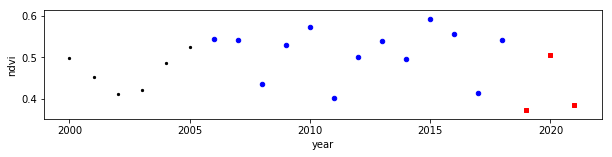

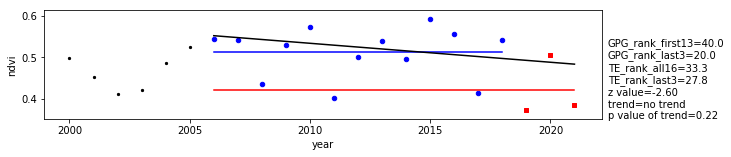

mean of 2006-2021:  ndvi    0.495226
dtype: float64
mean of 2019-2021:  ndvi    0.421801
dtype: float64


,ndvi
2019-12-31,0.373962
2021-12-31,0.385822
2011-12-31,0.402334
2017-12-31,0.414068
2008-12-31,0.434352
2014-12-31,0.494716
2012-12-31,0.501476
2020-12-31,0.505618
2009-12-31,0.529089
2013-12-31,0.539147


In [225]:
example = 439

df = pd.DataFrame()
df['year']= np.arange(2000, 2022)
df.index= pd.date_range(start='2000', end='2022', freq='1Y')
df['ndvi'] = array_ndvi[example]

plot_ndvi_only_points(year, df)
plot_ndvi(year, df)

print('mean of 2006-2021: ',df.loc[str(year-15):str(year), ['ndvi']].mean())
print('mean of 2019-2021: ',df.loc[str(year-2):str(year), ['ndvi']].mean())
df.loc[str(year-15):str(year), ['ndvi']].sort_values(by='ndvi')
